# **Computer Assignment 5 - AI**

# Neural Networks using Tensorflow

## Mohammad Amin Baqershahi

## 810197464





---



### Project Description

In this project we are about to diagnose patients with COVID 19 or PNEUMONIA using their CT Scan images and Feed Forward Neural Networks tools prepared by Tensorflow and Keras. We have datasets which are going to be used as training data and test data (<a href="https://drive.google.com/file/d/1WZTP-S-_8YVu5XFJ1cXCCQ65jNQGx32o/view?usp=sharing"> datasets </a>).



---



In [4]:
from tensorflow.keras import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Step 1

In this section I load both train and test data.

Then Images turned grayscale and will be resized into 80 x 80.

In [ ]:
data_generator = preprocessing.image.ImageDataGenerator()

train_data = data_generator.flow_from_directory(
    "/content/Data/train",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

test_data = data_generator.flow_from_directory(
    "/content/Data/test",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


### Step 2



**1**

In this part examples for each class are shown.

In [ ]:
batch = next(train_data)

Labels:  {'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


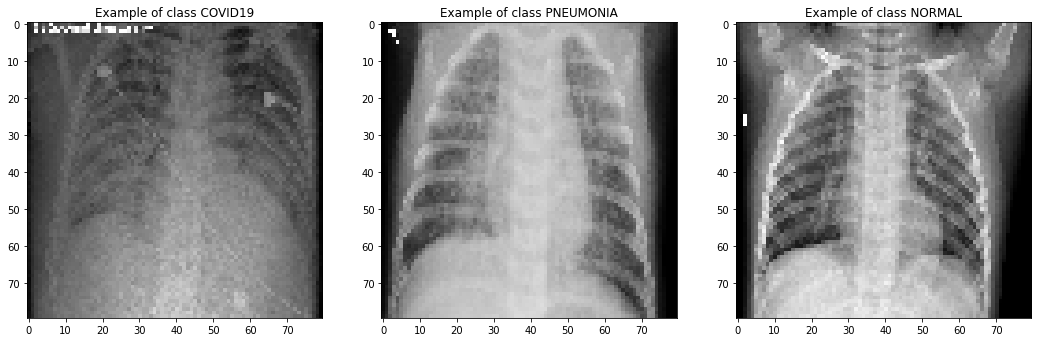

In [ ]:
print("Labels: ", train_data.class_indices)
label_dict = {0: "COVID19", 1: "NORMAL", 2: "PNEUMONIA"}

fig=plt.figure(figsize=(18, 8))
columns = 3
rows = 1

img1 = batch[0][21, :, :, 0]
fig.add_subplot(rows, columns, 1)
plt.imshow(img1, cmap = plt.get_cmap('gray'))
label1 = label_dict[np.where(batch[1][21] == 1)[0].tolist()[0]]
plt.title("Example of class " + str(label1))

img2 = batch[0][3, :, :, 0]
fig.add_subplot(rows, columns, 2)
plt.imshow(img2, cmap = plt.get_cmap('gray'))
label2 = label_dict[np.where(batch[1][3] == 1)[0].tolist()[0]]
plt.title("Example of class " + label2)

img3 = batch[0][29, :, :, 0]
fig.add_subplot(rows, columns, 3)
plt.imshow(img3, cmap = plt.get_cmap('gray'))
label3 = label_dict[np.where(batch[1][29] == 1)[0].tolist()[0]]
plt.title("Example of class " + label3)
plt.show()

**2**

In this part frequency of each class in both train and test data are shown in bar diagrams.

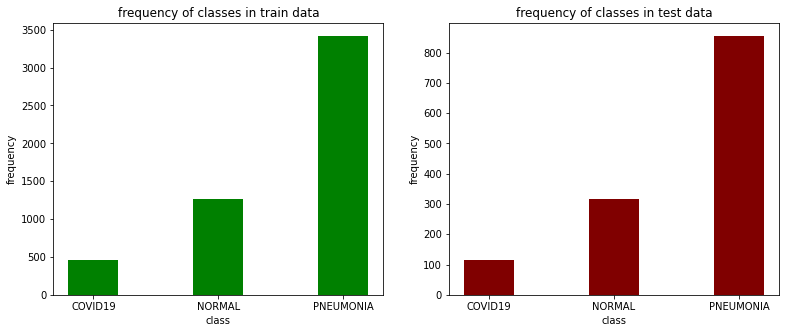

In [ ]:
train_label, train_freq = np.unique(train_data.labels, return_counts=True)
test_label, test_freq = np.unique(test_data.labels, return_counts=True)

fig = plt.figure(figsize = (13, 5))
columns = 2
rows = 1

fig.add_subplot(rows, columns, 1)
plt.bar(list(label_dict.values()), train_freq, color ='green', width = 0.4)
plt.xlabel("class")
plt.ylabel("frequency")
plt.title("frequency of classes in train data")

fig.add_subplot(rows, columns, 2)
plt.bar(list(label_dict.values()), test_freq, color ='maroon', width = 0.4)
plt.xlabel("class")
plt.ylabel("frequency")
plt.title("frequency of classes in test data")

plt.show()

### Step 3

In this part I define neural network with specific attributes.

In [6]:
from keras import backend
def Recall(y_true, y_pred):
    true_positives = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = backend.sum(backend.round(backend.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + backend.epsilon())

def Precision(y_true, y_pred):
    true_positives = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = backend.sum(backend.round(backend.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + backend.epsilon())

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision * recall) / (precision + recall + backend.epsilon()))

In [ ]:
input_layer = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(input_layer)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(3, activation = "softmax")(out)

In [ ]:
network = models.Model(inputs = input_layer, outputs = out)

In [ ]:
network.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['acc',F1, Precision, Recall])

### Number of parameters

---


**input layer:**

We dont any parameters to determine.


---


**flatten layer:**

We dont any parameters to determine.



---


**dense layer:**

number_of_inputs = 6400 <br>
number_of_neurons = 1024 <br>
weight_paramters = number_of_inputs * number_of_neurons = 6,553,600 <br>
bias_parameters = number_of_neurons = 1024 <br>
total_parameters = weight_paramters + bias_parameters = 6554624


---


**dense_1 layer:**

number_of_inputs = 1024 <br>
number_of_neurons = 1024 <br>
weight_paramters = number_of_inputs * number_of_neurons = 1,048,576 <br>
bias_parameters = number_of_neurons = 1024 <br>
total_parameters = weight_paramters + bias_parameters = 1049600


---

**dense_2 layer:**

number_of_inputs = 1024 <br>
number_of_neurons = 3 <br>
weight_paramters = number_of_inputs * number_of_neurons = 3072 <br>
bias_parameters = number_of_neurons = 3 <br>
total_parameters = weight_paramters + bias_parameters = 3075

In [ ]:
network.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


### Step 4

1

In this part I use Relu function as activation function. <br>

In the first epoch I see that the loss value abruptly rises up and overflow happens. Thus loss, precision, recall and f1 get nan value. Then training procedure and optimization disrupted due to the nan values. So accuracy falls down during flawed training.<br>
According to not normalization and relu formula, the reason can be understood. By not normalization range of values is 0 to 255 and relu for positive values just pass the same value. Then multiplication of these values create extreme large values which cause overflow. <br>
It seems that normalization is helpful to prevent appearing large values and overflow. <br>

In [ ]:
rhistory = network.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
161/161 [==============================] - 144s 892ms/step - loss: nan - acc: 0.1457 - F1: nan - Precision: nan - Recall: nan - val_loss: nan - val_acc: 0.0901 - val_F1: nan - val_Precision: nan - val_Recall: nan
Epoch 2/10
161/161 [==============================] - 142s 886ms/step - loss: nan - acc: 0.0859 - F1: nan - Precision: nan - Recall: nan - val_loss: nan - val_acc: 0.0901 - val_F1: nan - val_Precision: nan - val_Recall: nan
Epoch 3/10
161/161 [==============================] - 142s 885ms/step - loss: nan - acc: 0.0900 - F1: nan - Precision: nan - Recall: nan - val_loss: nan - val_acc: 0.0901 - val_F1: nan - val_Precision: nan - val_Recall: nan
Epoch 4/10
161/161 [==============================] - 142s 882ms/step - loss: nan - acc: 0.0874 - F1: nan - Precision: nan - Recall: nan - val_loss: nan - val_acc: 0.0901 - val_F1: nan - val_Precision: nan - val_Recall: nan
Epoch 5/10
161/161 [==============================] - 142s 882ms/step - loss: nan - acc: 0.0923 - F1: na

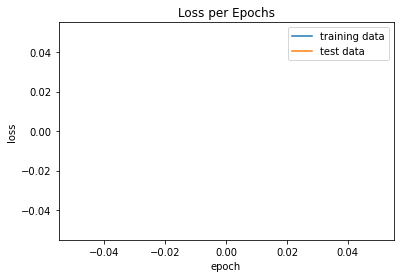

In [ ]:
plt.plot(rhistory.history['loss'], label='training data')
plt.plot(rhistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

2

In this part I use Tanh function as activation function. <br>

By using tanh as activation function we can see problem of overflow become eliminated. The reason is tanh can keep the values in low range (between -1 and 1). This avoids multiplications to create extreme large values. <br>
Alltough not happening overflow, the accuracy is not proper and training is little slow. <br>
Again the origin of this problem can be found in not normalization. By normalization mean of values stay close to 0. In fact normalization make the inputs smooth and scaled. This helps the model to converge better and faster.

In [ ]:
input_layer = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(input_layer)
out = layers.Dense(1024, activation = "tanh")(out)
out = layers.Dense(1024, activation = "tanh")(out)
out = layers.Dense(3, activation = "softmax")(out)

tnetwork = models.Model(inputs = input_layer, outputs = out)
tnetwork.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['acc',F1, Precision, Recall])

thistory = tnetwork.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
161/161 [==============================] - 144s 893ms/step - loss: 1.7587 - acc: 0.5428 - F1: 0.5195 - Precision: 0.5266 - Recall: 0.5150 - val_loss: 1.2392 - val_acc: 0.2461 - val_F1: 0.2467 - val_Precision: 0.2473 - val_Recall: 0.2462
Epoch 2/10
161/161 [==============================] - 143s 887ms/step - loss: 0.9686 - acc: 0.5975 - F1: 0.5396 - Precision: 0.5551 - Recall: 0.5379 - val_loss: 0.9163 - val_acc: 0.6638 - val_F1: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00
Epoch 3/10
161/161 [==============================] - 142s 885ms/step - loss: 0.9702 - acc: 0.5987 - F1: 0.5013 - Precision: 0.5042 - Recall: 0.5011 - val_loss: 0.9352 - val_acc: 0.6638 - val_F1: 0.6631 - val_Precision: 0.6631 - val_Recall: 0.6631
Epoch 4/10
161/161 [==============================] - 144s 892ms/step - loss: 0.9140 - acc: 0.6268 - F1: 0.5665 - Precision: 0.5666 - Recall: 0.5664 - val_loss: 0.8994 - val_acc: 0.6638 - val_F1: 0.6608 - val_Precision: 0.6608 - val_Recall: 0.6

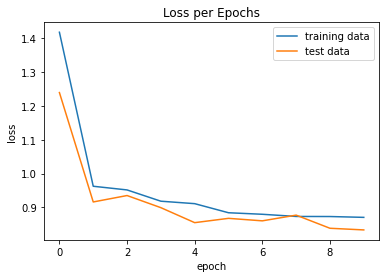

In [ ]:
plt.plot(thistory.history['loss'], label='training data')
plt.plot(thistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

3

As exmplained before: <br><br>

Relu: <br>
In the first epoch I see that the loss value abruptly rises up and overflow happens. Thus loss, precision, recall and f1 get nan value. Then training procedure and optimization disrupted due to the nan values. So accuracy falls down during flawed training.<br>
According to not normalization and relu formula, the reason can be understood. By not normalization range of values is 0 to 255 and relu for positive values just pass the same value. Then multiplication of these values create extreme large values which cause overflow. <br>
It seems that normalization is helpful to prevent appearing large values and overflow. <br><br>

Tanh: <br>
By using tanh as activation function we can see problem of overflow become eliminated. The reason is tanh can keep the values in low range (between -1 and 1). This avoids multiplications to create extreme large values. <br>
Alltough not happening overflow, the accuracy is not proper and training is little slow. <br>
Again the origin of this problem can be found in not normalization. By normalization mean of values stay close to 0. In fact normalization make the inputs smooth and scaled. This helps the model to converge better and faster. <br><br>

Conclusion: <br>
To solve the problems explained I should normalize the values. (by dividing each pixle by 255)

### Step 5

In this part I normalize the data. And network will be trained.

In [ ]:
n_data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)

n_train_data = n_data_generator.flow_from_directory(
    "/content/Data/train",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

n_test_data = n_data_generator.flow_from_directory(
    "/content/Data/test",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

input_layer = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(input_layer)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(3, activation = "softmax")(out)

nnetwork = models.Model(inputs = input_layer, outputs = out)
nnetwork.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['acc',F1, Precision, Recall])
nhistory = nnetwork.fit(n_train_data, validation_data=n_test_data, epochs=10)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Epoch 1/10
161/161 [==============================] - 161s 996ms/step - loss: 0.7460 - acc: 0.6686 - F1: 0.6549 - Precision: 0.6861 - Recall: 0.6328 - val_loss: 0.3161 - val_acc: 0.9084 - val_F1: 0.9092 - val_Precision: 0.9204 - val_Recall: 0.8986
Epoch 2/10
161/161 [==============================] - 158s 980ms/step - loss: 0.3742 - acc: 0.8531 - F1: 0.8514 - Precision: 0.8607 - Recall: 0.8427 - val_loss: 0.2545 - val_acc: 0.9161 - val_F1: 0.9195 - val_Precision: 0.9294 - val_Recall: 0.9101
Epoch 3/10
161/161 [==============================] - 157s 978ms/step - loss: 0.3296 - acc: 0.8734 - F1: 0.8717 - Precision: 0.8797 - Recall: 0.8642 - val_loss: 0.3299 - val_acc: 0.8742 - val_F1: 0.8720 - val_Precision: 0.8761 - val_Recall: 0.8681
Epoch 4/10
161/161 [==============================] - 157s 976ms/step - loss: 0.3030 - acc: 0.8862 - F1: 0.8875 - Precision: 0.8942 - Recall: 0.8811 - val_loss: 0.2064 - va

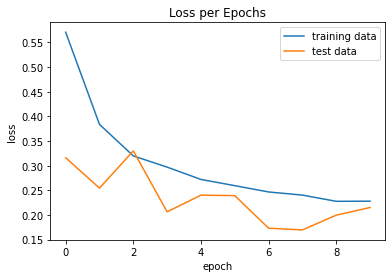

In [ ]:
plt.plot(nhistory.history['loss'], label='training data')
plt.plot(nhistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

### Step 6

1

Intuation:<br>
Momentum is a technique that can be used to improve training speed and accuracy. <br>
When the model reaches a local minimum it does not affect the changning direction and it tries to continue changing the values to get out of that local minimum.<br>
But when the model reaches deeper minimums the model stops. <br>
This things (stopping or continuing during optimization) are handled by a parameter.
<br><br>
Advantages: <br>
Momentum cause the model converge and to be trained faster. <br>
Momentum also helps the model not to stuck in local minimums and thus it cause the model to find global minimums and this improve accuracy of the model.<br>


2

momentum = 0.5:

By using 0.5 as momentum the model reach high accuracy and F1 faster (in earlier epoch). In fact the model does not need all the epochs. <br>
In addition we can see results of the model on test data have less fluctuations and became more stable (In comarison with momentum of 0). <br>
The reason of getting better accuracy faster is directly because of using momentum of 0.5. By using momentum of 0.5 changes of weights are leaded to a specific direction. And are accelarated in that direction. In fact we add value of 0.5 as velocity of updating. <br>
So by orientation of updating to a direction fluctuates decrease and convergence happens faster. 

In [ ]:
n_data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)

n_train_data = n_data_generator.flow_from_directory(
    "/content/Data/train",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

n_test_data = n_data_generator.flow_from_directory(
    "/content/Data/test",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

input_layer = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(input_layer)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(3, activation = "softmax")(out)

mnetwork = models.Model(inputs = input_layer, outputs = out)
mnetwork.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss="categorical_crossentropy", metrics=['acc',F1, Precision, Recall])
mhistory = mnetwork.fit(n_train_data, validation_data=n_test_data, epochs=10)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Epoch 1/10
161/161 [==============================] - 152s 941ms/step - loss: 0.6844 - acc: 0.7145 - F1: 0.7073 - Precision: 0.7373 - Recall: 0.6937 - val_loss: 0.2580 - val_acc: 0.9030 - val_F1: 0.9018 - val_Precision: 0.9043 - val_Recall: 0.8994
Epoch 2/10
161/161 [==============================] - 152s 943ms/step - loss: 0.3159 - acc: 0.8776 - F1: 0.8779 - Precision: 0.8823 - Recall: 0.8738 - val_loss: 0.2133 - val_acc: 0.9169 - val_F1: 0.9178 - val_Precision: 0.9203 - val_Recall: 0.9154
Epoch 3/10
161/161 [==============================] - 152s 948ms/step - loss: 0.2976 - acc: 0.8872 - F1: 0.8854 - Precision: 0.8906 - Recall: 0.8804 - val_loss: 0.1880 - val_acc: 0.9325 - val_F1: 0.9309 - val_Precision: 0.9327 - val_Recall: 0.9291
Epoch 4/10
161/161 [==============================] - 152s 947ms/step - loss: 0.2602 - acc: 0.9010 - F1: 0.9024 - Precision: 0.9060 - Recall: 0.8989 - val_loss: 0.1787 - va

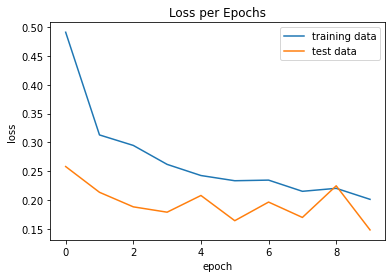

In [ ]:
plt.plot(mhistory.history['loss'], label='training data')
plt.plot(mhistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

momentum = 0.9:

By using 0.9 as momentum just like 0.5 the model reach high accuracy and F1 faster (in earlier epoch). In fact the model does not need all the epochs. <br>
In addition we can see results of the model on test data have less fluctuations and became more stable (In comarison with momentum of 0). <br>
The reason of getting better accuracy faster is directly because of using momentum of 0.9. By using momentum of 0.9 changes of weights are leaded to a specific direction. And are accelarated in that direction. In fact we add value of 0.5 as velocity of updating. <br>
So by orientation of updating to a direction fluctuates decrease and convergence happens faster. <br>
0.9 in comparison with 0.5 has less fluctuations. The reason is updating of weights oriented to a direction with more accelarion. In other words deviation from that direction is less because of more acceleration.

In [ ]:
n_data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)

n_train_data = n_data_generator.flow_from_directory(
    "/content/Data/train",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

n_test_data = n_data_generator.flow_from_directory(
    "/content/Data/test",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

input_layer = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(input_layer)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(3, activation = "softmax")(out)

mnetwork = models.Model(inputs = input_layer, outputs = out)
mnetwork.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss="categorical_crossentropy", metrics=['acc',F1, Precision, Recall])
mhistory = mnetwork.fit(n_train_data, validation_data=n_test_data, epochs=10)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Epoch 1/10
161/161 [==============================] - 154s 955ms/step - loss: 0.8044 - acc: 0.6777 - F1: 0.6727 - Precision: 0.6889 - Recall: 0.6609 - val_loss: 0.3014 - val_acc: 0.8843 - val_F1: 0.8815 - val_Precision: 0.8884 - val_Recall: 0.8750
Epoch 2/10
161/161 [==============================] - 152s 948ms/step - loss: 0.3238 - acc: 0.8734 - F1: 0.8728 - Precision: 0.8790 - Recall: 0.8670 - val_loss: 0.2123 - val_acc: 0.9200 - val_F1: 0.9212 - val_Precision: 0.9242 - val_Recall: 0.9184
Epoch 3/10
161/161 [==============================] - 153s 950ms/step - loss: 0.2851 - acc: 0.8996 - F1: 0.8983 - Precision: 0.9024 - Recall: 0.8943 - val_loss: 0.2110 - val_acc: 0.9193 - val_F1: 0.9206 - val_Precision: 0.9253 - val_Recall: 0.9162
Epoch 4/10
161/161 [==============================] - 152s 942ms/step - loss: 0.2603 - acc: 0.9080 - F1: 0.9078 - Precision: 0.9109 - Recall: 0.9048 - val_loss: 0.1790 - va

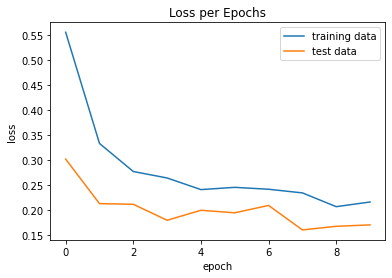

In [ ]:
plt.plot(mhistory.history['loss'], label='training data')
plt.plot(mhistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

momentum = 0.99:

As we can see the metrics of the model are not good. And procedure of optimization encounter some problems. <br>
Using 0.99 as momentum give the optimization extremly high acceleration that updating weights become extremly oriented. Actually it is hard for model to deviate from its direction and correct itself. The high acceleration also lead the model not to stop in global minimums and the model may get out of them due to high acceleration. So the optimization of weights did not perform well.

In [17]:
n_data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)

n_train_data = n_data_generator.flow_from_directory(
    "/content/Data/train",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

n_test_data = n_data_generator.flow_from_directory(
    "/content/Data/test",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

input_layer = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(input_layer)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(3, activation = "softmax")(out)

mnetwork = models.Model(inputs = input_layer, outputs = out)
mnetwork.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.99), loss="categorical_crossentropy", metrics=['acc',F1, Precision, Recall])
mhistory = mnetwork.fit(n_train_data, validation_data=n_test_data, epochs=10)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Epoch 1/10
161/161 [==============================] - 143s 886ms/step - loss: 0.7045 - acc: 0.6985 - F1: 0.6895 - Precision: 0.7050 - Recall: 0.6776 - val_loss: 0.2471 - val_acc: 0.9068 - val_F1: 0.9071 - val_Precision: 0.9095 - val_Recall: 0.9047
Epoch 2/10
161/161 [==============================] - 141s 880ms/step - loss: 0.3498 - acc: 0.8754 - F1: 0.8750 - Precision: 0.8807 - Recall: 0.8695 - val_loss: 0.6058 - val_acc: 0.7259 - val_F1: 0.7213 - val_Precision: 0.7223 - val_Recall: 0.7203
Epoch 3/10
161/161 [==============================] - 141s 881ms/step - loss: 0.7540 - acc: 0.6948 - F1: 0.6930 - Precision: 0.6956 - Recall: 0.6906 - val_loss: 0.8351 - val_acc: 0.6638 - val_F1: 0.6608 - val_Precision: 0.6608 - val_Recall: 0.6608
Epoch 4/10
161/161 [==============================] - 141s 877ms/step - loss: 0.7444 - acc: 0.7244 - F1: 0.7214 - Precision: 0.7337 - Recall: 0.7114 - val_loss: 0.9119 - va

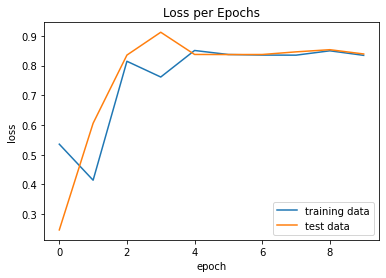

In [18]:
plt.plot(mhistory.history['loss'], label='training data')
plt.plot(mhistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

3

High values for momentum can cause the optimizion to extremly oriented to a direction and lose the ability too change the directions in necessary times.<br>
When the model reach global minimum the optimization may be countinued because high accelation and overshoot that global minimum. And it can reduce accuracy and increase loss. <br>
Usually a number between 0.5 and 0.9 as momentum is helpful to improve speed and accuracy of model.

4

In this part I use Adam as optimizer. <br>
Adam has several advantages like simplicity of implementation, better convergence in noisy or sparse gredients, efficient computation, lower memory needs, easier parameter tuning and ...<br><br>

Using Adam as optimizer reduce error specially in train data (shown in diagram bellow). In addition it seems that the model gets acceptable metrics (like accuracy and epoch)earlier (in epoch 1 and 2). But using SGD it gets same metrics in latter epochs than Adam.<br>
Like momentum, adam also cause the model to converge faster. <br>
We can also see that it was better to stop training in epoch 8. Because after that epoch model starts overfitting. <br>
Thus setting number of epochs with more precision or early stopping can give use better result.



In [ ]:
n_data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)

n_train_data = n_data_generator.flow_from_directory(
    "/content/Data/train",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

n_test_data = n_data_generator.flow_from_directory(
    "/content/Data/test",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

input_layer = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(input_layer)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(3, activation = "softmax")(out)

anetwork = models.Model(inputs = input_layer, outputs = out)
anetwork.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=['acc',F1, Precision, Recall])
ahistory = anetwork.fit(n_train_data, validation_data=n_test_data, epochs=10)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Epoch 1/10
161/161 [==============================] - 143s 888ms/step - loss: 0.1227 - acc: 0.9549 - F1: 0.9547 - Precision: 0.9560 - Recall: 0.9534 - val_loss: 0.1377 - val_acc: 0.9526 - val_F1: 0.9535 - val_Precision: 0.9542 - val_Recall: 0.9527
Epoch 2/10
161/161 [==============================] - 142s 884ms/step - loss: 0.1267 - acc: 0.9543 - F1: 0.9539 - Precision: 0.9553 - Recall: 0.9525 - val_loss: 0.1552 - val_acc: 0.9464 - val_F1: 0.9476 - val_Precision: 0.9503 - val_Recall: 0.9451
Epoch 3/10
161/161 [==============================] - 142s 883ms/step - loss: 0.1253 - acc: 0.9539 - F1: 0.9541 - Precision: 0.9550 - Recall: 0.9532 - val_loss: 0.1440 - val_acc: 0.9503 - val_F1: 0.9511 - val_Precision: 0.9519 - val_Recall: 0.9505
Epoch 4/10
161/161 [==============================] - 142s 884ms/step - loss: 0.1183 - acc: 0.9570 - F1: 0.9570 - Precision: 0.9582 - Recall: 0.9559 - val_loss: 0.1381 - va

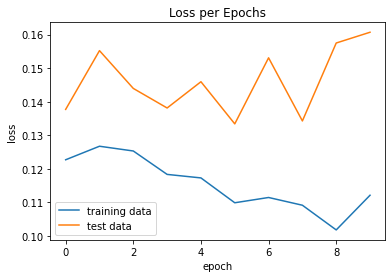

In [ ]:
plt.plot(ahistory.history['loss'], label='training data')
plt.plot(ahistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

### Step 7

1

In [ ]:
n_data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)

n_train_data = n_data_generator.flow_from_directory(
    "/content/Data/train",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

n_test_data = n_data_generator.flow_from_directory(
    "/content/Data/test",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

input_layer = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(input_layer)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(3, activation = "softmax")(out)

enetwork = models.Model(inputs = input_layer, outputs = out)
enetwork.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=['acc',F1, Precision, Recall])
ehistory = enetwork.fit(n_train_data, validation_data=n_test_data, epochs=20)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Epoch 1/20
161/161 [==============================] - 151s 934ms/step - loss: 2.0345 - acc: 0.7135 - F1: 0.7097 - Precision: 0.7165 - Recall: 0.7035 - val_loss: 0.2356 - val_acc: 0.9200 - val_F1: 0.9163 - val_Precision: 0.9227 - val_Recall: 0.9101
Epoch 2/20
161/161 [==============================] - 149s 928ms/step - loss: 0.2994 - acc: 0.8843 - F1: 0.8826 - Precision: 0.8875 - Recall: 0.8780 - val_loss: 0.2190 - val_acc: 0.9154 - val_F1: 0.9171 - val_Precision: 0.9189 - val_Recall: 0.9154
Epoch 3/20
161/161 [==============================] - 148s 923ms/step - loss: 0.2911 - acc: 0.8927 - F1: 0.8909 - Precision: 0.8952 - Recall: 0.8867 - val_loss: 0.2022 - val_acc: 0.9270 - val_F1: 0.9279 - val_Precision: 0.9283 - val_Recall: 0.9276
Epoch 4/20
161/161 [==============================] - 149s 924ms/step - loss: 0.2932 - acc: 0.8907 - F1: 0.8898 - Precision: 0.8942 - Recall: 0.8856 - val_loss: 0.1968 - va

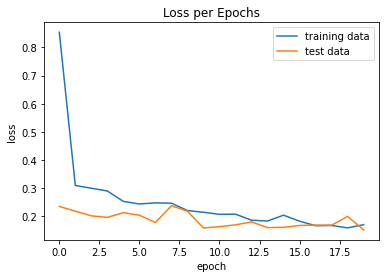

In [ ]:
plt.plot(ehistory.history['loss'], label='training data')
plt.plot(ehistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

2

In neural networks specially in deep neural networks there is huge number of parameters which should be optimized. Optimizing huge number of parameters requires huge number of labaled trained data which is not always accessible and cheap. So we can use several epochs. By doing this the model see the data several times and it helps us to get better results and generalization. <br>

3

Using too many epochs for training may cause the model to overfitt. Actually the model sees the training data many times and have achieve great performance on training data. But it does not perform well on unseen data. 

### Step 8

1

Using mse as loss function decrease accuracy and F1 metrics considerably. It seems that procedure of ooptimzation encountered some problems. <br>

In [ ]:
n_data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)

n_train_data = n_data_generator.flow_from_directory(
    "/content/Data/train",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

n_test_data = n_data_generator.flow_from_directory(
    "/content/Data/test",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

input_layer = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(input_layer)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(1024, activation = "relu")(out)
out = layers.Dense(3, activation = "softmax")(out)

mnetwork = models.Model(inputs = input_layer, outputs = out)
mnetwork.compile(optimizer=optimizers.Adam(), loss="mse", metrics=['acc',F1, Precision, Recall])
mhistory = mnetwork.fit(n_train_data, validation_data=n_test_data, epochs=20)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Epoch 1/20
161/161 [==============================] - 162s 1s/step - loss: 0.2203 - acc: 0.6520 - F1: 0.6467 - Precision: 0.6467 - Recall: 0.6467 - val_loss: 0.2241 - val_acc: 0.6638 - val_F1: 0.6631 - val_Precision: 0.6631 - val_Recall: 0.6631
Epoch 2/20
161/161 [==============================] - 160s 993ms/step - loss: 0.2232 - acc: 0.6651 - F1: 0.6651 - Precision: 0.6651 - Recall: 0.6651 - val_loss: 0.2241 - val_acc: 0.6638 - val_F1: 0.6654 - val_Precision: 0.6654 - val_Recall: 0.6654
Epoch 3/20
161/161 [==============================] - 160s 996ms/step - loss: 0.2231 - acc: 0.6654 - F1: 0.6656 - Precision: 0.6656 - Recall: 0.6656 - val_loss: 0.2241 - val_acc: 0.6638 - val_F1: 0.6585 - val_Precision: 0.6585 - val_Recall: 0.6585
Epoch 4/20
161/161 [==============================] - 160s 995ms/step - loss: 0.2258 - acc: 0.6613 - F1: 0.6614 - Precision: 0.6614 - Recall: 0.6614 - val_loss: 0.2241 - val_a

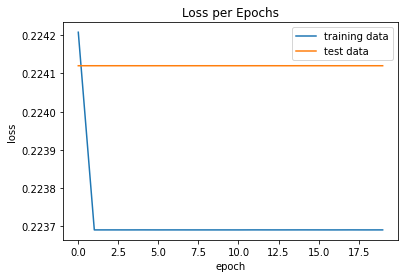

In [ ]:
plt.plot(mhistory.history['loss'], label='training data')
plt.plot(mhistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

2

Mean square error shows distance between the actual and predicted value. But the predictions and actual values in classification problems are lables and not continues values and by using MSE in these problems it tries to assume the lables as numbers and result wrong values for losses. <br><br>

In classification problems Crossentropy is preferred and in regression problems MSE is preferred.

### Step 9

2

In this part I use L2 for regularization with value of 0.0001. <br>

L2 regularization is used to avoid overfitting. <br>

As we can see in the diagrams of train and test losses, there is no overfitting at all. The model perform same and even better on unseen data in comparison with train data. <br>
By adding more epochs we can also get better results for accuracy and F1.

In [ ]:
n_data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)

n_train_data = n_data_generator.flow_from_directory(
    "/content/Data/train",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

n_test_data = n_data_generator.flow_from_directory(
    "/content/Data/test",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

input_layer = layers.Input(shape = (80, 80, 1))

out = layers.Flatten()(input_layer)
out = layers.Dense(1024, activation = "relu", kernel_regularizer=regularizers.L2(l2 = 0.0001))(out)
out = layers.Dense(1024, activation = "relu", kernel_regularizer=regularizers.L2(l2 = 0.0001))(out)
out = layers.Dense(3, activation = "softmax", kernel_regularizer=regularizers.L2(l2 = 0.0001))(out)

rnetwork = models.Model(inputs = input_layer, outputs = out)
rnetwork.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=['acc',F1, Precision, Recall])
rhistory = rnetwork.fit(n_train_data, validation_data=n_test_data, epochs=20)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Epoch 1/20
161/161 [==============================] - 153s 948ms/step - loss: 2.2682 - acc: 0.6741 - F1: 0.6614 - Precision: 0.6874 - Recall: 0.6511 - val_loss: 0.4165 - val_acc: 0.9177 - val_F1: 0.9171 - val_Precision: 0.9277 - val_Recall: 0.9070
Epoch 2/20
161/161 [==============================] - 152s 943ms/step - loss: 0.4725 - acc: 0.8813 - F1: 0.8796 - Precision: 0.8845 - Recall: 0.8750 - val_loss: 0.3448 - val_acc: 0.9216 - val_F1: 0.9227 - val_Precision: 0.9256 - val_Recall: 0.9200
Epoch 3/20
161/161 [==============================] - 151s 942ms/step - loss: 0.4082 - acc: 0.8926 - F1: 0.8926 - Precision: 0.8966 - Recall: 0.8887 - val_loss: 0.3660 - val_acc: 0.9053 - val_F1: 0.9065 - val_Precision: 0.9115 - val_Recall: 0.9017
Epoch 4/20
161/161 [==============================] - 152s 945ms/step - loss: 0.3773 - acc: 0.8960 - F1: 0.8963 - Precision: 0.8992 - Recall: 0.8935 - val_loss: 0.4339 - va

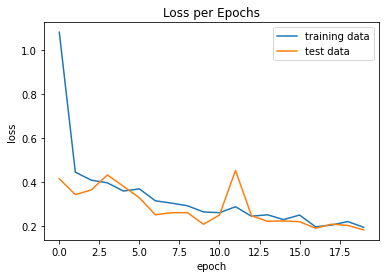

In [ ]:
plt.plot(rhistory.history['loss'], label='training data')
plt.plot(rhistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

3

In this part I use dropout layers for regularization. <br>

By using dropout layers some parts of network will be ommited on iterating batches. By doing this we have different networks for each batche and in fact learning attributes of each batch become distributed over the network and this reduce the chance of overfitting. <br> 
Ommiting parts of network happens randomly using the parameter we set for each layer. <br><br>

As we can see in the diagrams of train and test losses, there is no overfitting at all. The model perform same and even better on unseen data in comparison with train data. <br>

In [15]:
n_data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)

n_train_data = n_data_generator.flow_from_directory(
    "/content/Data/train",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

n_test_data = n_data_generator.flow_from_directory(
    "/content/Data/test",
    target_size = (80, 80),
    color_mode = "grayscale",
    batch_size = 32
)

input_layer = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(input_layer)
out = layers.Dropout(rate=0.1)(out)
out = layers.Dropout(rate=0.1)(out)
out = layers.Dense(3, activation = "softmax")(out)

dnetwork = models.Model(inputs = input_layer, outputs = out)
dnetwork.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=['acc',F1, Precision, Recall])
dhistory = dnetwork.fit(n_train_data, validation_data=n_test_data, epochs=20)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Epoch 1/20
161/161 [==============================] - 144s 891ms/step - loss: 0.7593 - acc: 0.7216 - F1: 0.7095 - Precision: 0.7277 - Recall: 0.6965 - val_loss: 0.2731 - val_acc: 0.9045 - val_F1: 0.9048 - val_Precision: 0.9073 - val_Recall: 0.9024
Epoch 2/20
161/161 [==============================] - 143s 887ms/step - loss: 0.3780 - acc: 0.8696 - F1: 0.8688 - Precision: 0.8722 - Recall: 0.8656 - val_loss: 0.2189 - val_acc: 0.9161 - val_F1: 0.9156 - val_Precision: 0.9174 - val_Recall: 0.9139
Epoch 3/20
161/161 [==============================] - 143s 891ms/step - loss: 0.2896 - acc: 0.9006 - F1: 0.9014 - Precision: 0.9046 - Recall: 0.8983 - val_loss: 0.2536 - val_acc: 0.9099 - val_F1: 0.9100 - val_Precision: 0.9147 - val_Recall: 0.9055
Epoch 4/20
161/161 [==============================] - 144s 893ms/step - loss: 0.2960 - acc: 0.8812 - F1: 0.8801 - Precision: 0.8832 - Recall: 0.8771 - val_loss: 0.2649 - va

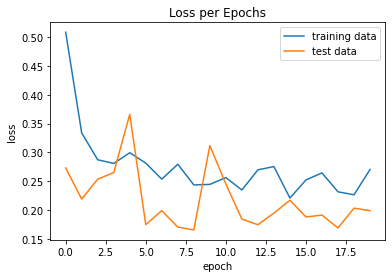

In [16]:
plt.plot(dhistory.history['loss'], label='training data')
plt.plot(dhistory.history['val_loss'], label='test data')
plt.title('Loss per Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()